In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean",
    "Smoothness_mean", "Compactness_mean", "Concavity_mean", "Concave_points_mean",
    "Symmetry_mean", "Fractal_dimension_mean", "Radius_se", "Texture_se", "Perimeter_se",
    "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se", "Concave_points_se",
    "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst", "Perimeter_worst",
    "Area_worst", "Smoothness_worst", "Compactness_worst", "Concavity_worst",
    "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

data = pd.read_csv(url, header=None, names=columns)

# Drop the ID column
data.drop(columns=["ID"], inplace=True)

# Encode the target variable
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]


In [7]:
# Display the first few rows of the features
print(X.head())

# Display the first few rows of the targets
print(y.head())

# Check for missing values
print(X.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   Fractal_dimension_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
0           

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544


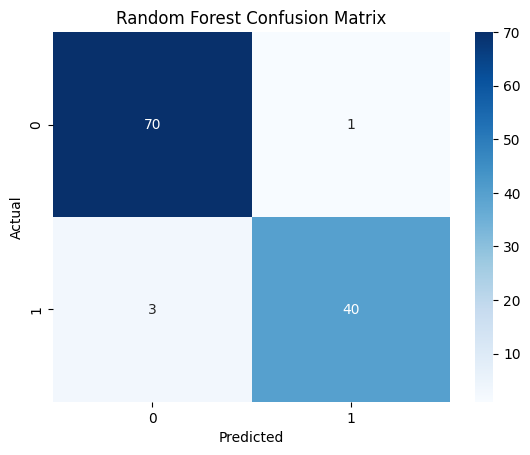

In [11]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [12]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [13]:
y_pred_svm = svm_model.predict(X_test)

# Classification report
print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9736842105263158


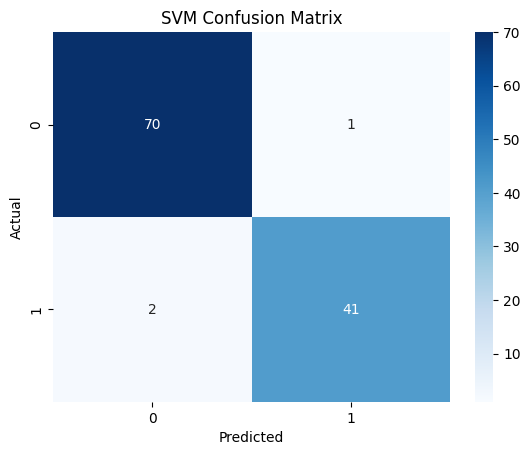

In [14]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()
